<a href="https://colab.research.google.com/github/SoheilBadri2000/DataScience2/blob/main/06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

In [31]:
from scipy.stats import entropy
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.datasets import make_moons, load_breast_cancer, load_iris, load_wine, fetch_covtype, make_classification
from sklearn.pipeline import Pipeline
from six import StringIO
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt

In [2]:
p = [2/8, 6/8]
ent = entropy(p, base=2)
print("entropy is", ent)

entropy is 0.8112781244591328


# Play-Tennis dataset

In [3]:
!wget https://gist.github.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/archive/4a8e3da267a0c1f0d650901d8295a5153bde8b21.zip

--2023-11-13 18:28:11--  https://gist.github.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/archive/4a8e3da267a0c1f0d650901d8295a5153bde8b21.zip
Resolving gist.github.com (gist.github.com)... 140.82.114.3
Connecting to gist.github.com (gist.github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/gist/c6590d0cf119e87c39e31c21a9c0f3a8/zip/4a8e3da267a0c1f0d650901d8295a5153bde8b21 [following]
--2023-11-13 18:28:11--  https://codeload.github.com/gist/c6590d0cf119e87c39e31c21a9c0f3a8/zip/4a8e3da267a0c1f0d650901d8295a5153bde8b21
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 722 [application/zip]
Saving to: ‘4a8e3da267a0c1f0d650901d8295a5153bde8b21.zip’

4a8e3da267a0c1f0d65 100%[===================>]     722  --.-KB/s    in 0s      

2023-11-13 18:28:

In [4]:
!unzip 4a8e3da267a0c1f0d650901d8295a5153bde8b21.zip

Archive:  4a8e3da267a0c1f0d650901d8295a5153bde8b21.zip
4a8e3da267a0c1f0d650901d8295a5153bde8b21
   creating: c6590d0cf119e87c39e31c21a9c0f3a8-4a8e3da267a0c1f0d650901d8295a5153bde8b21/
  inflating: c6590d0cf119e87c39e31c21a9c0f3a8-4a8e3da267a0c1f0d650901d8295a5153bde8b21/PlayTennis.csv  


In [5]:
!mv c6590d0cf119e87c39e31c21a9c0f3a8-4a8e3da267a0c1f0d650901d8295a5153bde8b21 tennis_folder

In [6]:
df = pd.read_csv('tennis_folder/PlayTennis.csv')

In [7]:
df.shape

(14, 5)

In [8]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [9]:
string_to_int = LabelEncoder()
df = df.apply(string_to_int.fit_transform) # fit and transform it

In [10]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [11]:
# To divide our data into attribute set and label:
feature_cols = ["Outlook", "Temperature", "Humidity", "Wind"]
X = df[feature_cols]
y = df["Play Tennis"]

In [12]:
# To divide our data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


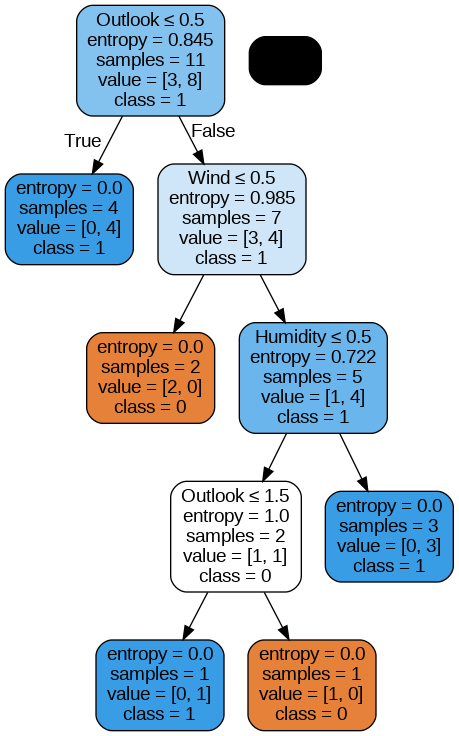

In [16]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True,
                rounded=True, special_characters=True,
                feature_names=feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Play Tennis.png")
Image(graph.create_png())

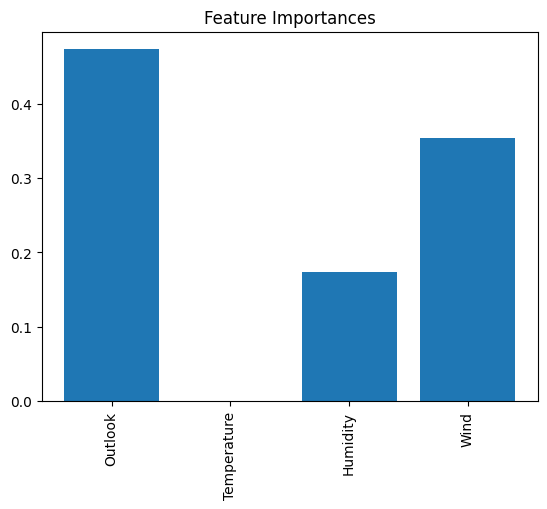

In [17]:
# Plot feature importances
plt.bar(range(len(classifier.feature_importances_)), classifier.feature_importances_)
plt.xticks(range(len(classifier.feature_importances_)), feature_cols, rotation=90)
plt.title("Feature Importances")
plt.show()

# Generate Toy Dataset

In [18]:
# Generate toy dataset
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

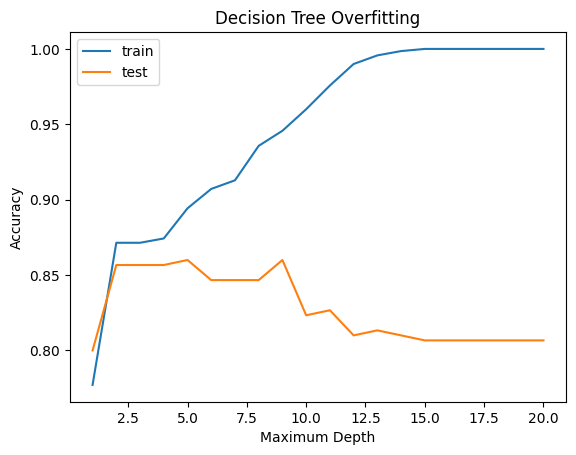

In [19]:
# Train decision tree models with maximum depths
train_scores = []
test_scores = []
depths = range(1, 21)
for depth in depths:
  dtc = DecisionTreeClassifier(max_depth=depth, random_state=42)
  dtc.fit(X_train, y_train)
  train_pred = dtc.predict(X_train)
  test_pred = dtc.predict(X_test)
  train_score = accuracy_score(y_train, train_pred)
  test_score = accuracy_score(y_test, test_pred)
  train_scores.append(train_score)
  test_scores.append(test_score)

# Plot training and testing accuracy scores against maximum tree depth
plt.plot(depths, train_scores, label="train")
plt.plot(depths, test_scores, label="test")
plt.legend()
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Overfitting")
plt.show()

# Breast Cancer Dataset

In [20]:
dataset_name = "load_wine"

# Load the dataset based on the external variable
if dataset_name == "breast_cancer":
  data = load_breast_cancer()
  X = data.data
  Y = data.target
elif dataset_name == "load_iris":
  data = load_iris()
  X = data.data
  Y = data.target
elif dataset_name == "load_wine":
  data = load_wine()
  X = data.data[:, :4] # select only the first four features
  Y = data.target
else:
  raise ValueError("Invalid dataset name")

In [21]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
# Train a decision tree model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [24]:
# Evaluate the models on the testing set
dtc_pred = dtc.predict(X_test)
rfc_pred = rfc.predict(X_test)

In [25]:
dtc_acc = accuracy_score(Y_test, dtc_pred)
rfc_acc = accuracy_score(Y_test, rfc_pred)
print(f"Decision tree accuraccy: {dtc_acc:.3f}")
print(f"Decision tree accuraccy: {rfc_acc:.3f}")

Decision tree accuraccy: 0.806
Decision tree accuraccy: 0.889


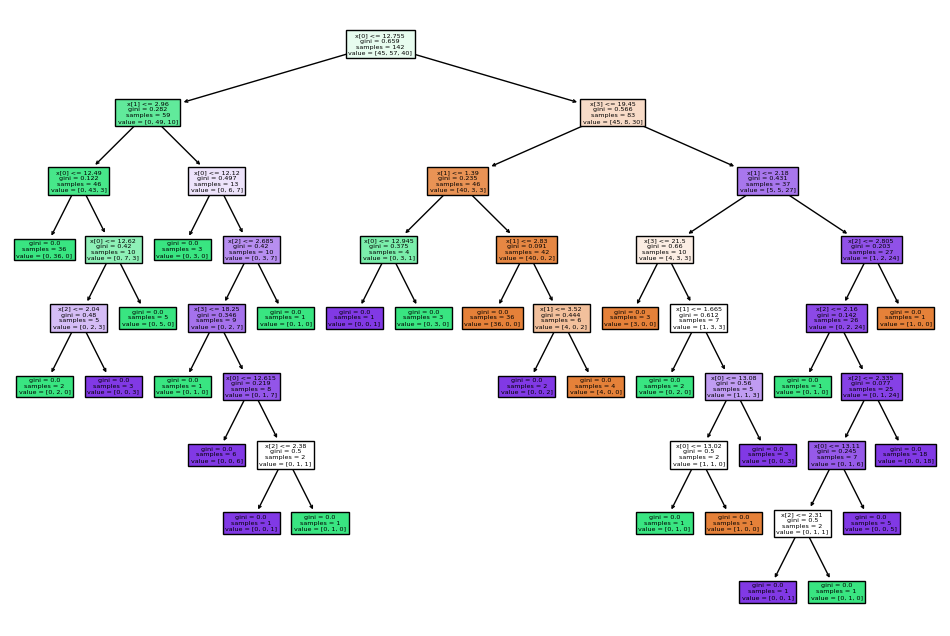

In [26]:
# Visualize the decision tree
plt.figure(figsize=(12,8))
plot_tree(dtc, filled=True)
plt.show()

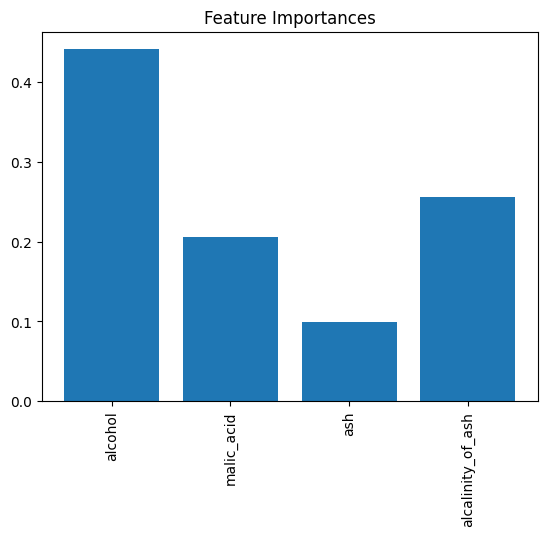

In [27]:
# Plot feature importances
plt.bar(range(len(dtc.feature_importances_)), dtc.feature_importances_)
plt.xticks(range(len(dtc.feature_importances_)), data.feature_names[:4], rotation=90)
plt.title("Feature Importances")
plt.show()

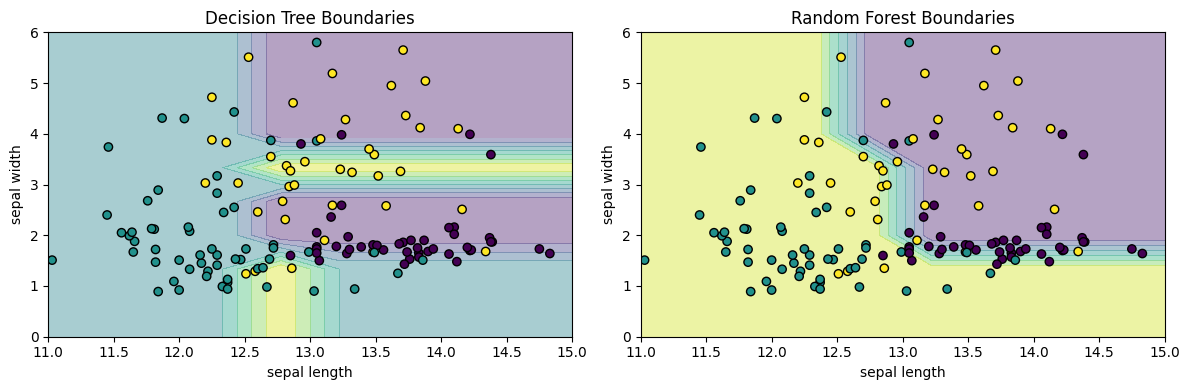

In [28]:
# Create a meshgrid of points to make predictions on
xx, yy, zz, ww = np.meshgrid(np.linspace(11,15,10), np.linspace(0,6,10), np.linspace(0,1,10), np.linspace(0,6,10))
X_grid = np.column_stack((xx.ravel(), yy.ravel(), zz.ravel(), ww.ravel()))

# Make predictions on the meshgrid
dtc_pred = dtc.predict(X_grid)
rfc_pred = rfc.predict(X_grid)

# Reshape predictions to the shape of xx and yy
dtc_pred = dtc_pred.reshape(xx.shape)
rfc_pred = rfc_pred.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.contourf(xx[:, :, 0, 0], yy[:, :, 0, 0], dtc_pred[:, :, 0, 0], alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolor='k')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Decision Tree Boundaries")

plt.subplot(122)
plt.contourf(xx[:, :, 0, 0], yy[:, :, 0, 0], rfc_pred[:, :, 0, 0], alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolor='k')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Random Forest Boundaries")

plt.tight_layout()
plt.show()

In [29]:
pipeline = Pipeline([("scaler", StandardScaler()), ("clf", DecisionTreeClassifier())])
clf_max_depth = [2, 5, 10, 12, 15, 18, 20, 25, None]
param_grid = {"clf__max_depth": clf_max_depth}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=10)
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)

{'clf__max_depth': 5}


# Random Classification Dataset

In [32]:
# Generate some random classification data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=42)

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# Create a decision tree model with no limits on dept
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
# Evaluate the model on the test set
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: {:.2f}".format(accuracy))

Accuracy on test set: 0.89


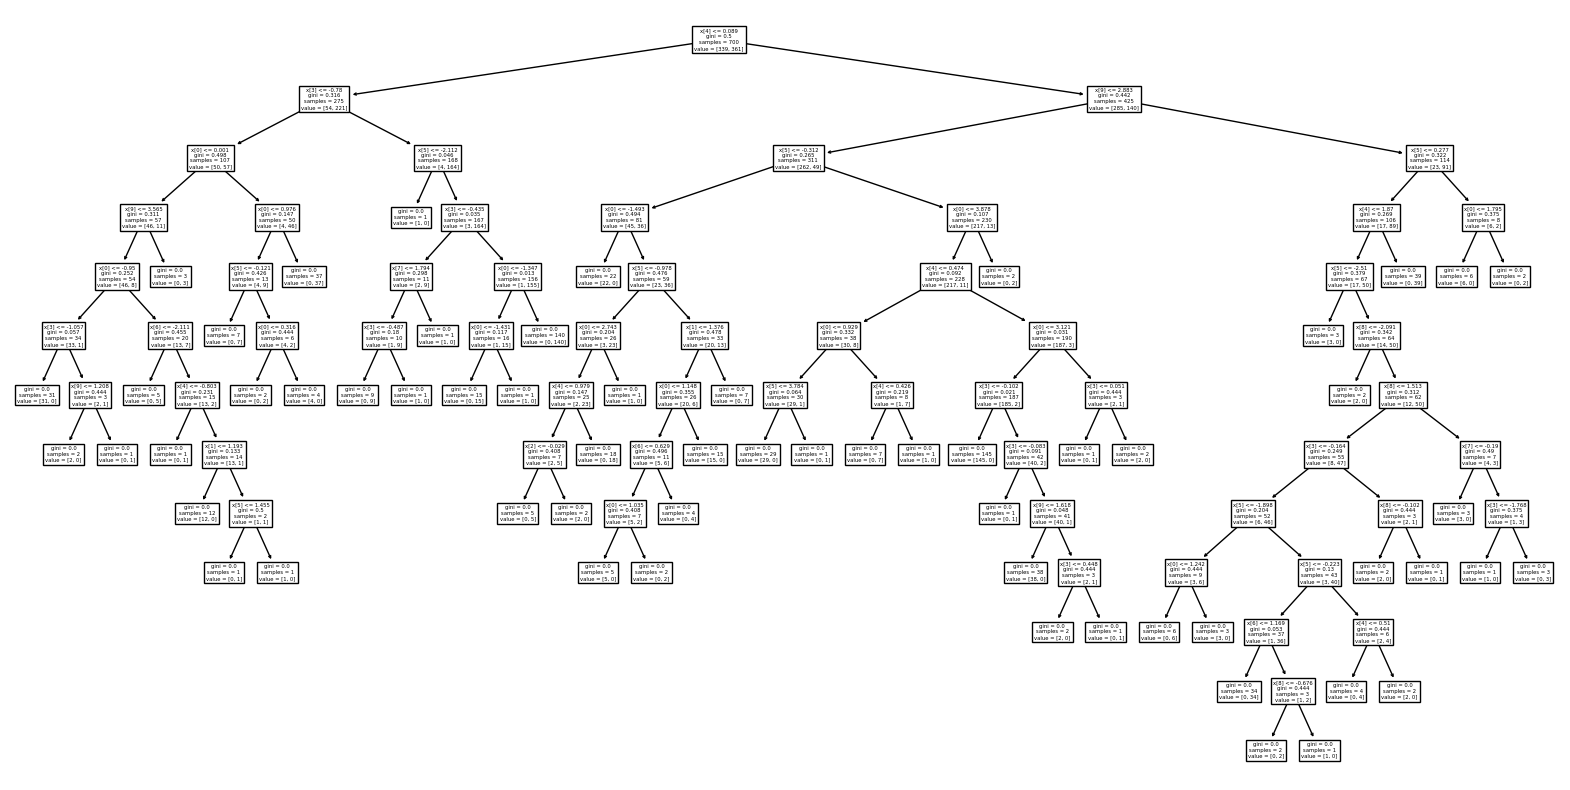

In [36]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dtc)
plt.show()

In [37]:
# Evaluate the model on the training set
y_pred_train = dtc.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on training set: {:.2f}".format(accuracy_train))

Accuracy on training set: 1.00


In [38]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[141  17]
 [ 17 125]]


In [39]:
# Limit the depth of the tree
dtc = DecisionTreeClassifier(max_depth=5, random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [40]:
# Evaluate the modelon the test set
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set (with depth limit): {:.2f}".format(accuracy))

Accuracy on test set (with depth limit): 0.90


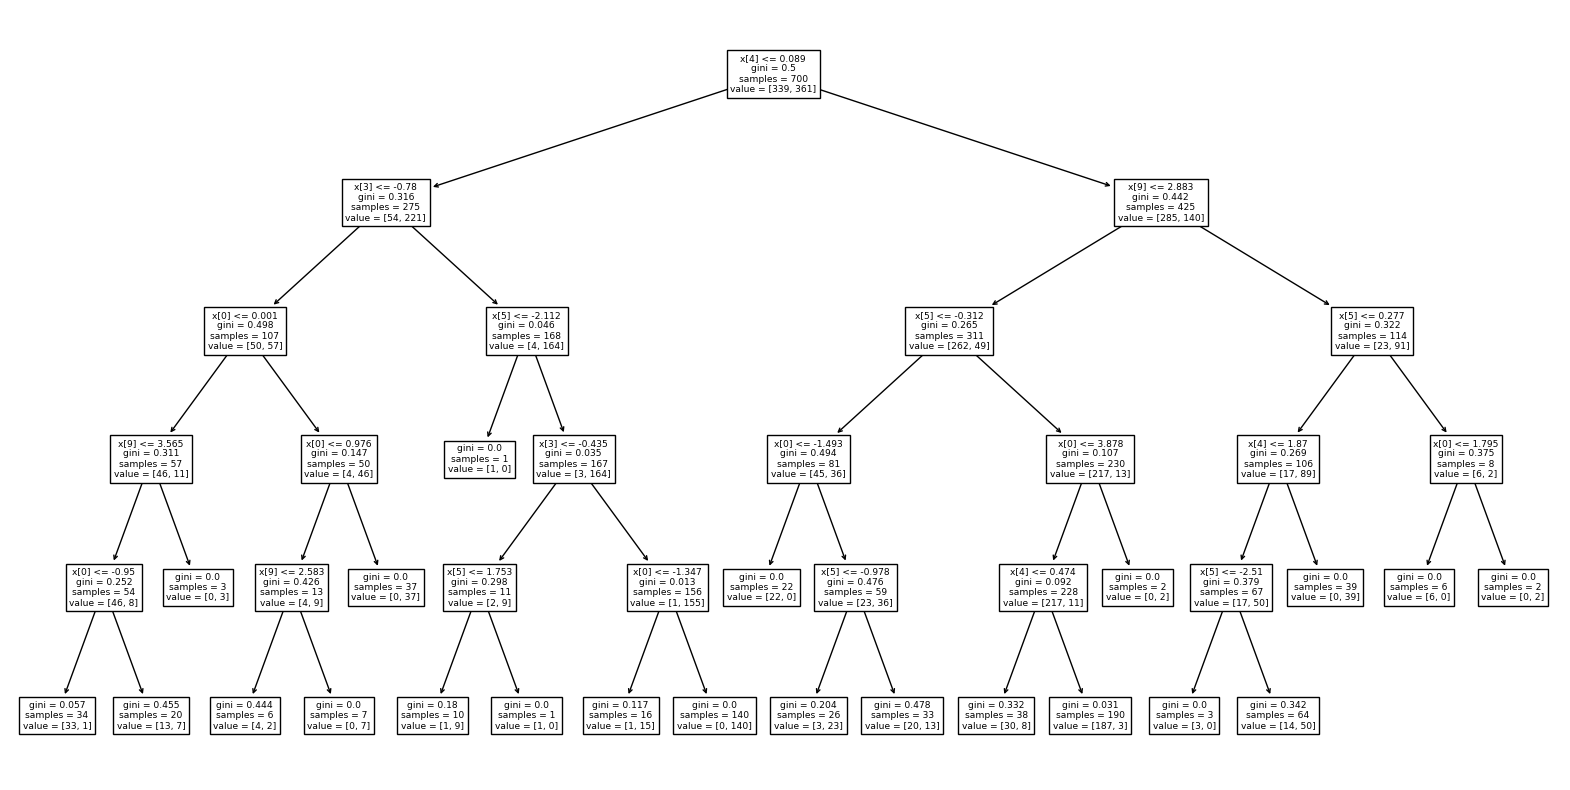

In [41]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dtc)
plt.show()

In [43]:
# Evaluate the model on the training set
y_pred_train = dtc.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on training set (with depth limit): {:.2f}".format(accuracy_train))

Accuracy on training set (with depth limit): 0.92


In [44]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[148  10]
 [ 21 121]]


In [45]:
# Prune the tree
path = dtc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

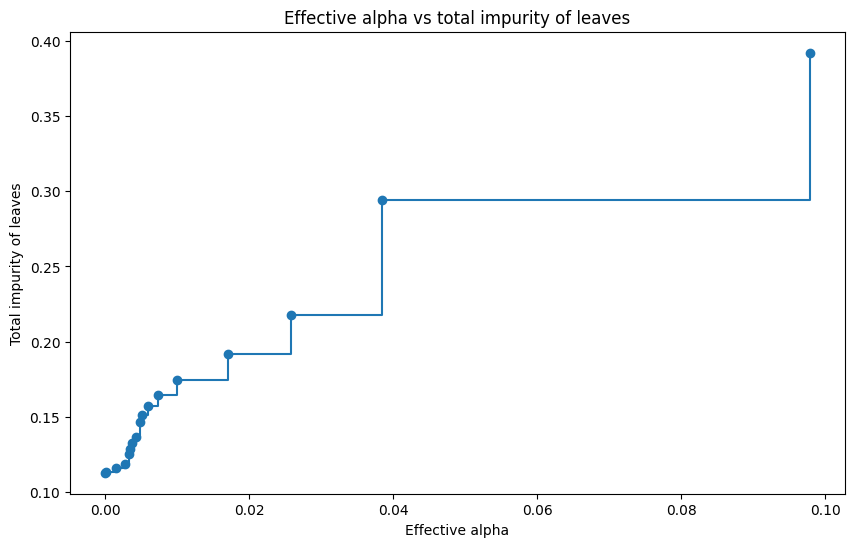

In [46]:
# Plot the effective alpha values
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("Effective alpha")
plt.ylabel("Total impurity of leaves")
plt.title("Effective alpha vs total impurity of leaves")
plt.show()

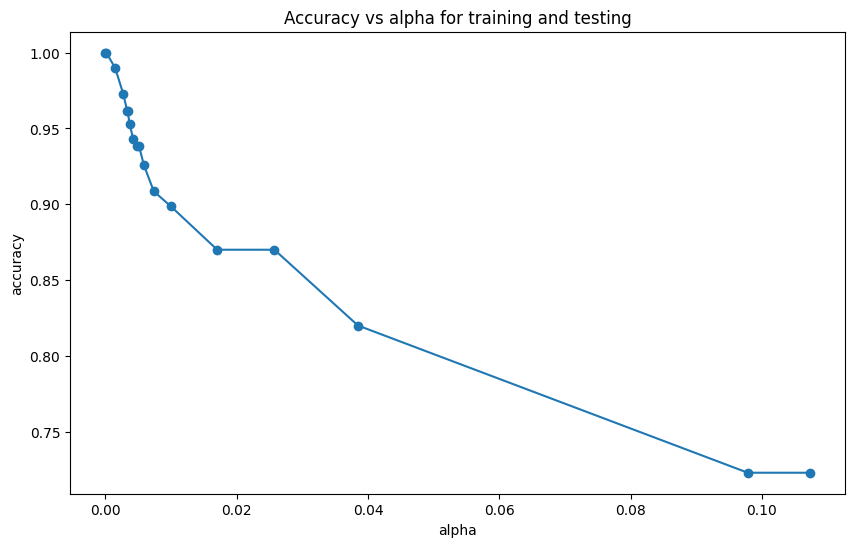

In [48]:
# Find the best values of ccp_alpha
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)

train_scores = [accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing")
ax.plot(ccp_alphas, train_scores, marker='o')
plt.show()